In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api


In [3]:
word2vec_model = api.load('word2vec-google-news-300')

[=================================================-] 99.7% 1658.6/1662.8MB downloaded


In [4]:
word2vec_model["tree"]

array([ 0.484375  ,  0.12255859, -0.15722656,  0.03466797, -0.21972656,
       -0.23535156,  0.11328125,  0.02770996,  0.1328125 ,  0.28710938,
        0.10546875, -0.24121094,  0.01989746,  0.03320312, -0.06933594,
       -0.08203125, -0.25976562, -0.1875    , -0.00643921,  0.09033203,
        0.00759888, -0.07666016, -0.10498047, -0.125     ,  0.18945312,
       -0.12158203, -0.18457031,  0.04785156,  0.22070312, -0.2578125 ,
       -0.04760742, -0.21972656, -0.03027344, -0.13476562, -0.04541016,
       -0.28125   , -0.06640625, -0.37304688,  0.02709961,  0.02246094,
        0.15039062, -0.14648438,  0.14648438, -0.20800781,  0.12890625,
       -0.24023438, -0.29492188,  0.07958984,  0.0255127 ,  0.07177734,
       -0.04418945,  0.11572266,  0.09179688, -0.03759766,  0.27929688,
       -0.06347656,  0.02282715,  0.14746094, -0.02832031, -0.07714844,
        0.08203125, -0.13476562,  0.20996094,  0.08544922, -0.1640625 ,
       -0.11669922,  0.16699219, -0.09375   , -0.11132812, -0.00

In [16]:
word2vec_model.most_similar("flower")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('floral', 0.7493643760681152),
 ('flowers', 0.7488502860069275),
 ('roses', 0.697738766670227),
 ('orchid', 0.6928980350494385),
 ('tulip', 0.6629416346549988),
 ('peony', 0.6613221168518066),
 ('blooms', 0.6554170250892639),
 ('blossoms', 0.6527379751205444),
 ('chrysanthemum', 0.6500308513641357),
 ('anthurium', 0.649766206741333)]

In [30]:
word2vec_model.most_similar(positive=['feminine', 'boy'], negative=['girl'], topn=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('masculine', 0.7106932401657104)]

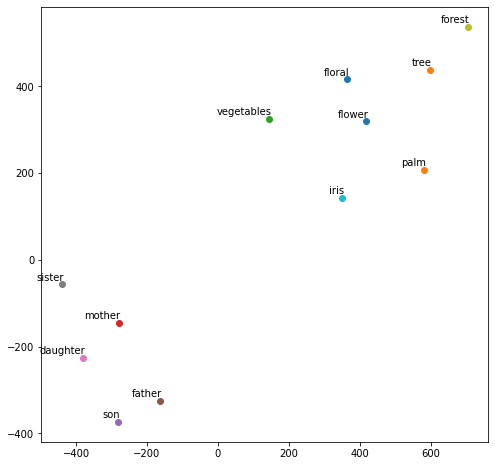

In [32]:
vocab = ["flower", "tree", "vegetables", "mother", "son", "father", "daughter", "sister", "forest", "iris", "floral", "palm"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)